In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/lynxdataset/LYNXdata.csv
/kaggle/input/nottingham-temp/nottem.csv


In [2]:
import pandas as pd
nottem = pd.read_csv("../input/nottingham-temp/nottem.csv",header=0,names=['month','temp'],index_col=0)
nottem.head()

,temp
month,
1,40.6
2,40.8
3,44.4
4,46.7
5,54.1


In [3]:
nottemseries=pd.Series((nottem.temp).values,index=pd.date_range('1920-01-31',periods=240,freq='M'))

In [4]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
expsmodel=ExponentialSmoothing(nottemseries,seasonal='additive',seasonal_periods=12)
expsmodelfit=expsmodel.fit()

In [5]:
expsmodelfit.params['smoothing_level']

0.0310129199747244

In [6]:
expsmodelfit.params['smoothing_seasonal']

0.0

In [7]:
expsfcast=expsmodelfit.predict(start=240,end=251)

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


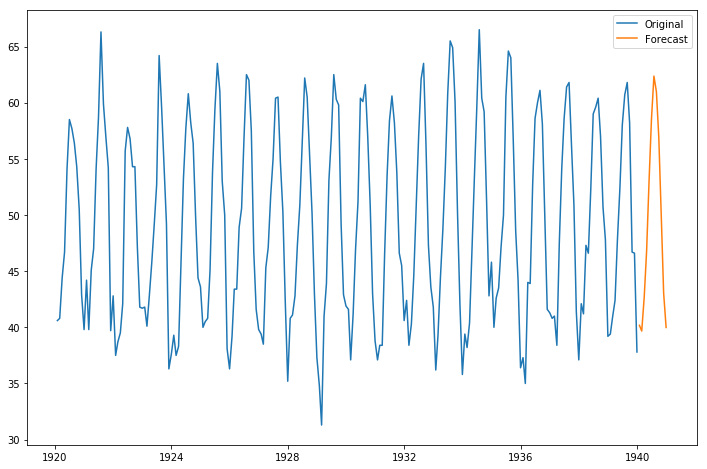

In [8]:
plt.figure(figsize=(12,8))
plt.plot(nottemseries,label='Original')
plt.plot(expsfcast,label='Forecast')
plt.legend()

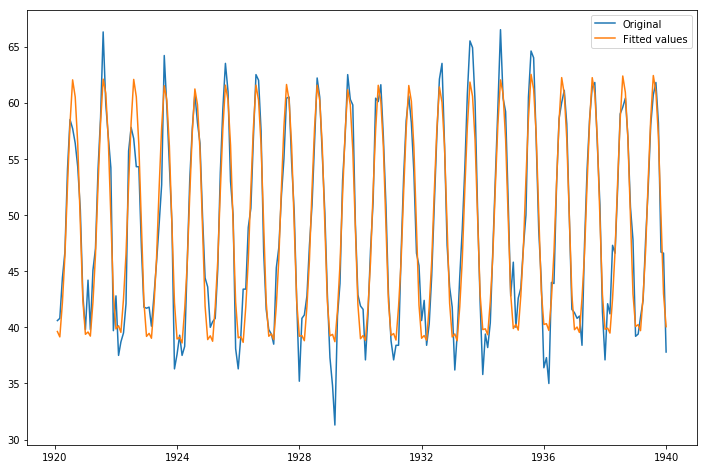

In [9]:
plt.figure(figsize=(12,8))
plt.plot(nottemseries,label='Original')
plt.plot(expsmodelfit.fittedvalues,label='Fitted values')
plt.legend()